# Fitbod Explaratory Data Analysis - Lea Genuit


### Import libraries and read data

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('fitbod_GenuitLea_20200807-213344.csv')
df.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2020-06-08,JAgdjAI9cQ,6REm9Tfqpa,bwKKQoHgDB,Dumbbell Row,8,20.411681,fake_id_502
1,2019-10-17,mwjPcB3wxs,mnwUcsbS9T,XKjXLl0gGH,Barbell Bench Press,5,61.235043,fake_id_533
2,2019-08-04,IEDHnMUqea,dXqYJgUYO6,ond03u06Hg,Deadlift,10,70.306901,fake_id_523
3,2019-08-30,p0U4rGUJ5r,dXqYJgUYO6,pCp8CKIEC1,Deadlift,12,61.235043,fake_id_511
4,2019-05-13,Z6zM13gFFC,52vo7F7CLd,YHFblNwlvF,Close-Grip Bench Press,12,34.019468,fake_id_546


In [20]:
df.shape

(25230, 8)

In [43]:
df.isna().sum()

Date            0
workoutId       0
exerciseId      0
singleSetId     0
exerciseName    0
reps            0
weight          0
fake_user_id    0
year            0
dtype: int64

The sample doesn't contain any null values

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [24]:
max(df.Date), min(df.Date)

(Timestamp('2020-08-07 00:00:00'), Timestamp('2018-01-21 00:00:00'))

The sample contains data between January 2018 and August 2020.

### Use of Fitbod

In [99]:
# Extract year
df['year'] = df.Date.dt.year

# Extract week number of the year
df['num_week'] = df.Date.dt.week

In [126]:
num_user_year = df[['year', 'fake_user_id']].groupby('year').agg({"fake_user_id": "nunique"}).reset_index()

<IPython.core.display.Javascript object>


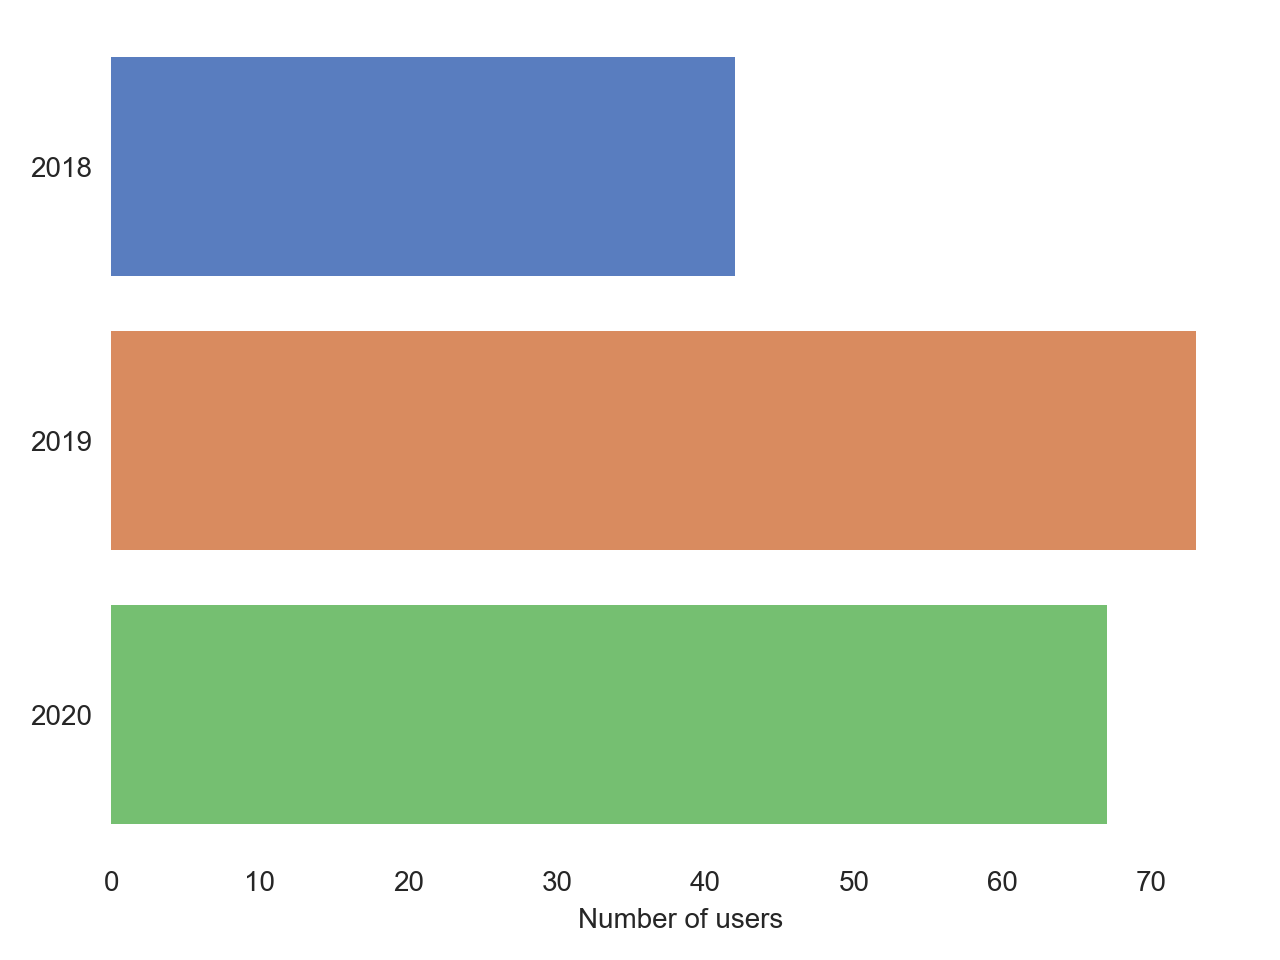

In [147]:
sns.set_style("white")
sns.barplot(x='fake_user_id', y='year', data=num_user_year, palette='muted', orient='h')
sns.despine(left=True, bottom=True)
plt.xlabel('Number of users')
plt.ylabel('')
plt.tight_layout()

In [137]:
# Per user number of time they use Fitbod per week
num_week_fitbod = \
df[['year', 'num_week',
    'workoutId', 'fake_user_id']].groupby(['fake_user_id','year',
                                           'num_week']).agg({"workoutId": "nunique"}).reset_index()

<IPython.core.display.Javascript object>


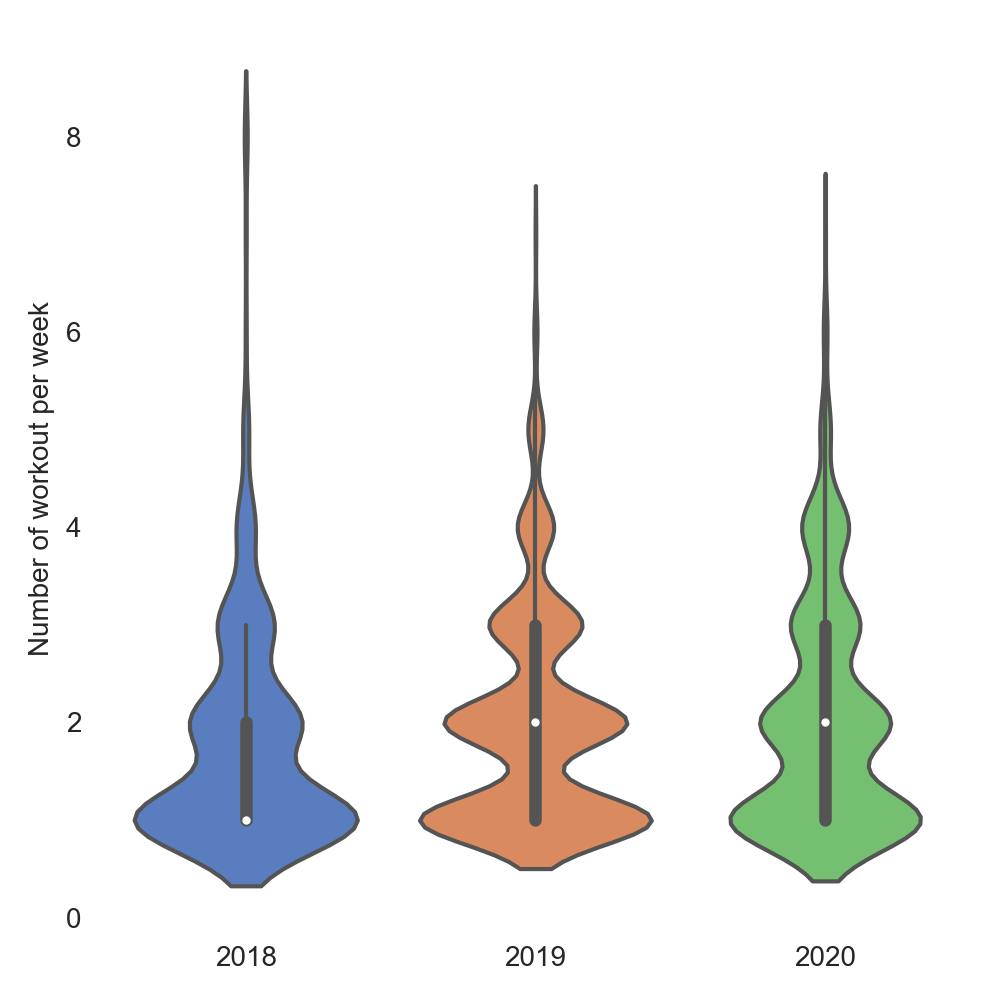

In [145]:
sns.set_style("white")
sns.catplot(x="year", y="workoutId", data=num_week_fitbod, kind="violin", palette='muted')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('Number of workout per week')
plt.tight_layout()

Violin plots interpretation:

- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

The average number of workout per week of a user can give us insights about their fitness level.

### Statistics about exercises

In [79]:
num_users_per_exercise = \
df[['exerciseName', 'fake_user_id']].groupby('exerciseName').agg({"fake_user_id": "nunique"}).reset_index()

num_users_per_exercise.columns = ['Exercise', 'Number of users']

<IPython.core.display.Javascript object>


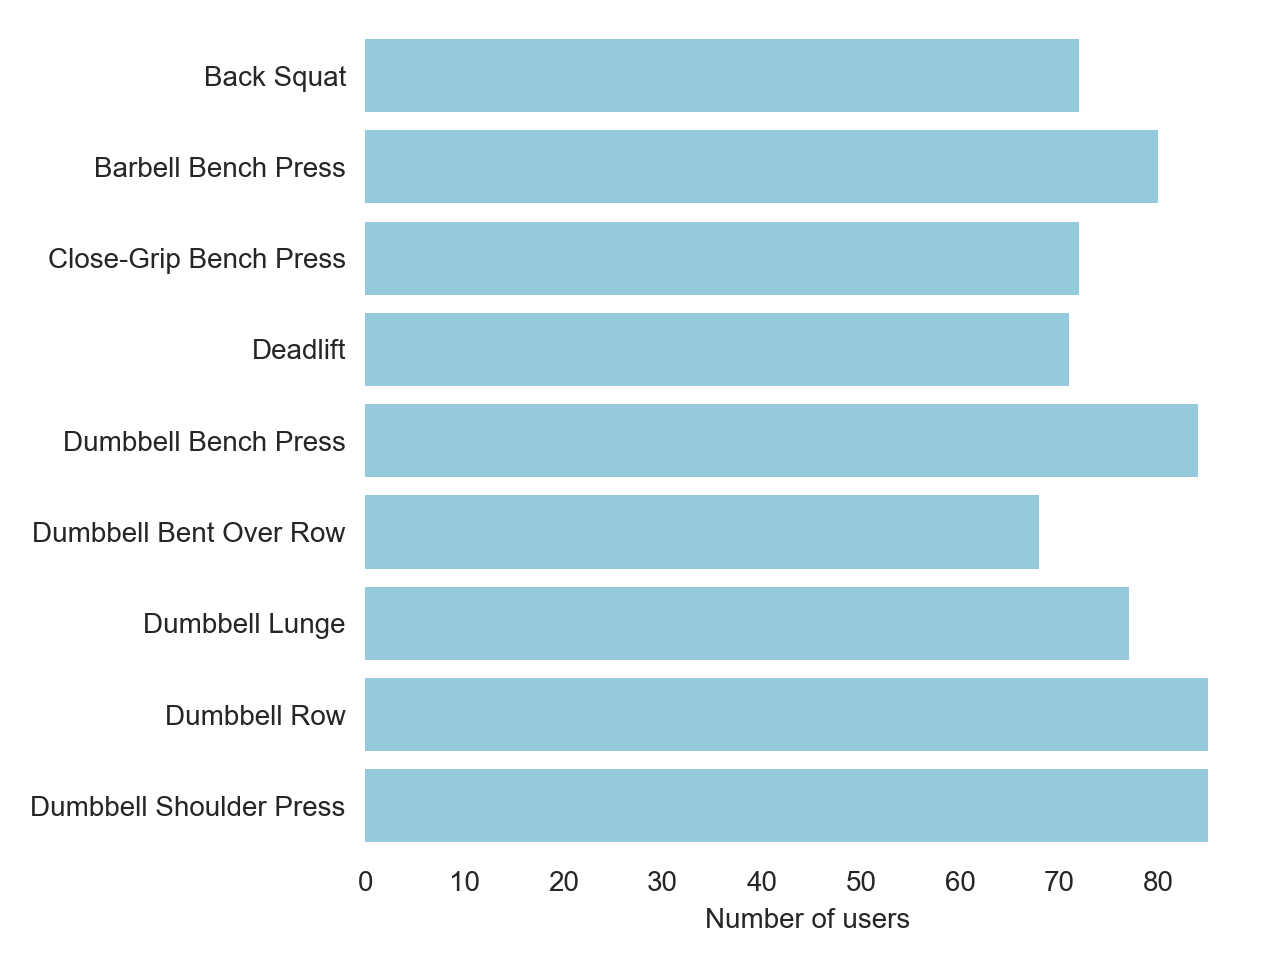

In [149]:
sns.set_style("white")
sns.barplot(x='Number of users', y='Exercise', data=num_users_per_exercise, color="skyblue")
sns.despine(left=True, bottom=True)
plt.ylabel('')
plt.tight_layout()

<IPython.core.display.Javascript object>


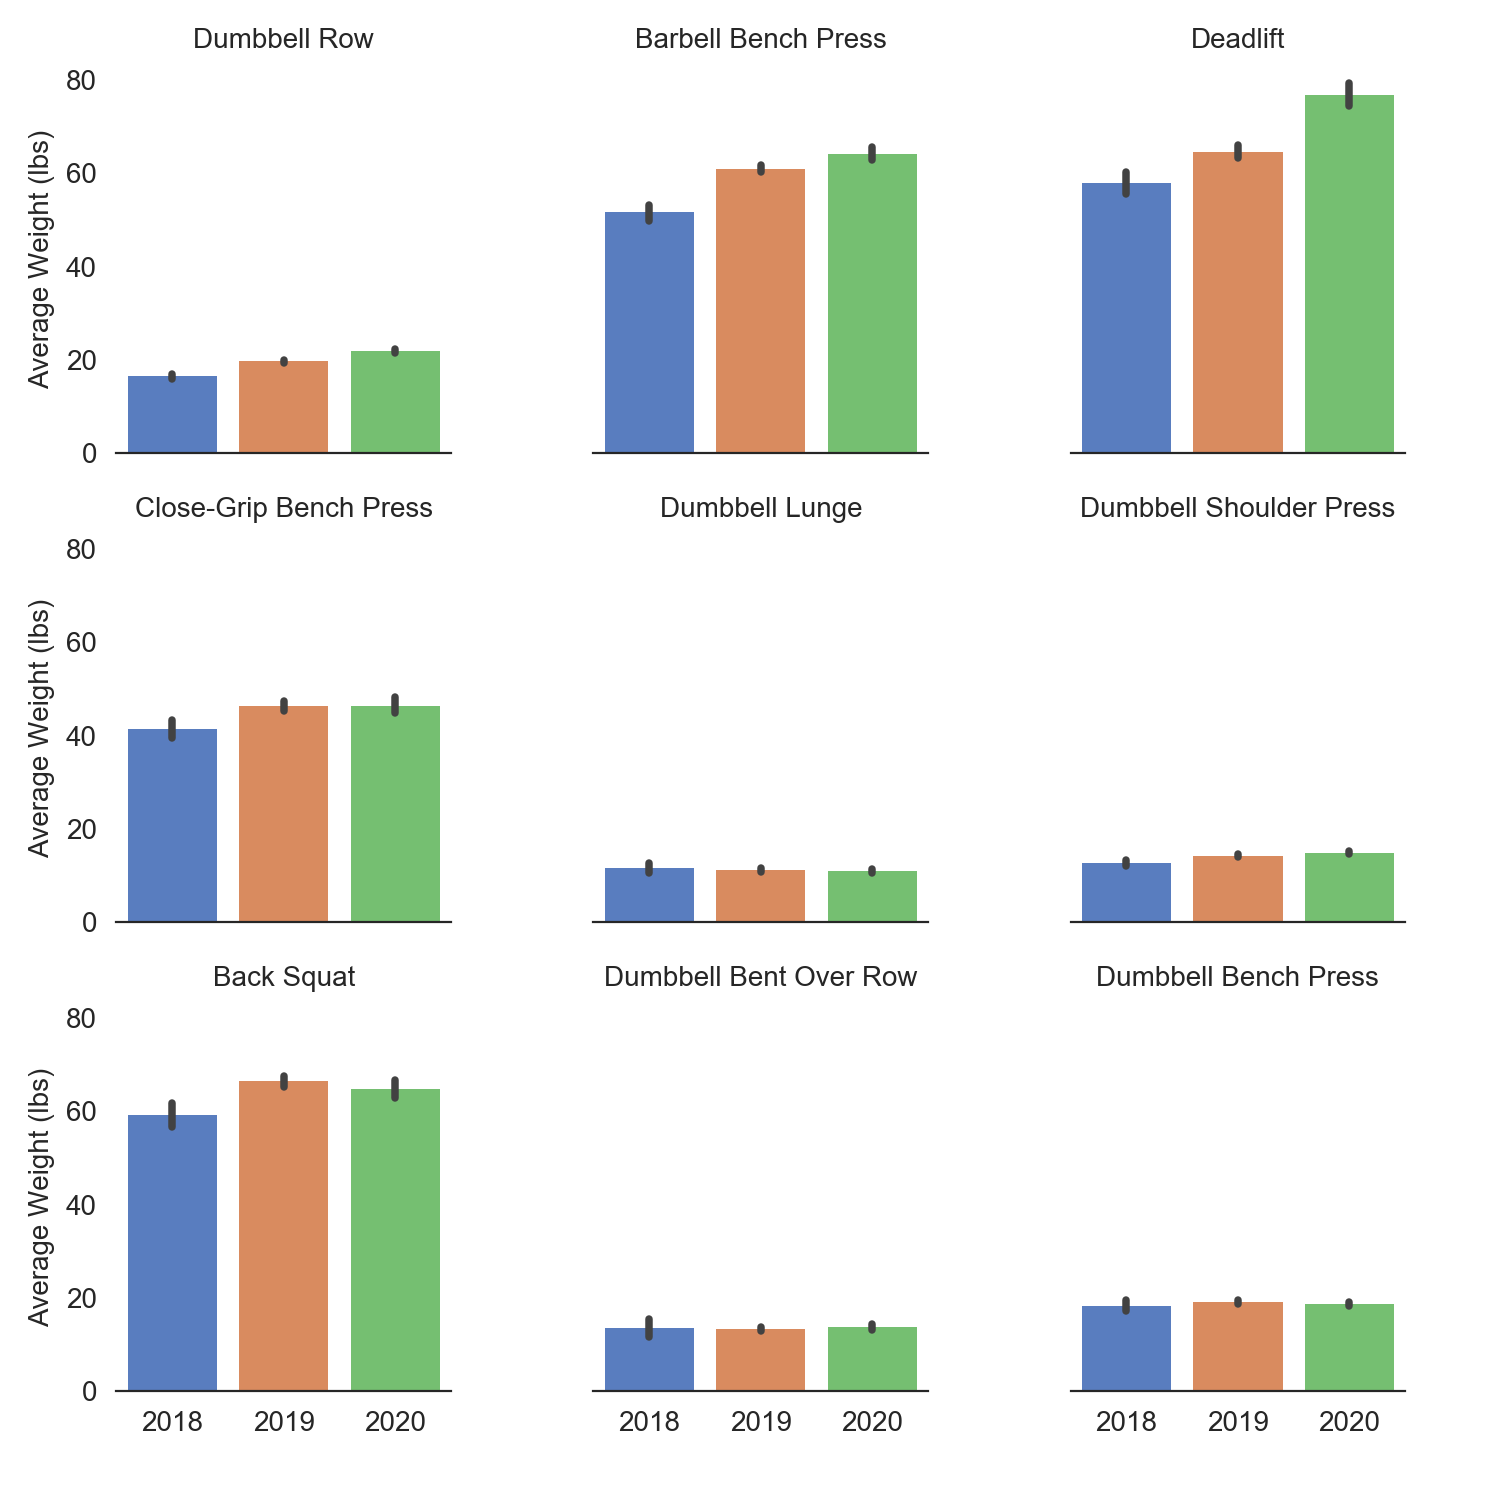

In [91]:
avg_weight_year_exercise = sns.catplot(x="year", y="weight", col="exerciseName", data=df,
                                       height=2.5, aspect=1, col_wrap=3, kind="bar",
                                       palette="muted", estimator=np.mean)

(avg_weight_year_exercise.set_axis_labels("", "Average Weight (lbs)")
                         .despine(left=True)
                         .set_titles("{col_name}"))

<IPython.core.display.Javascript object>


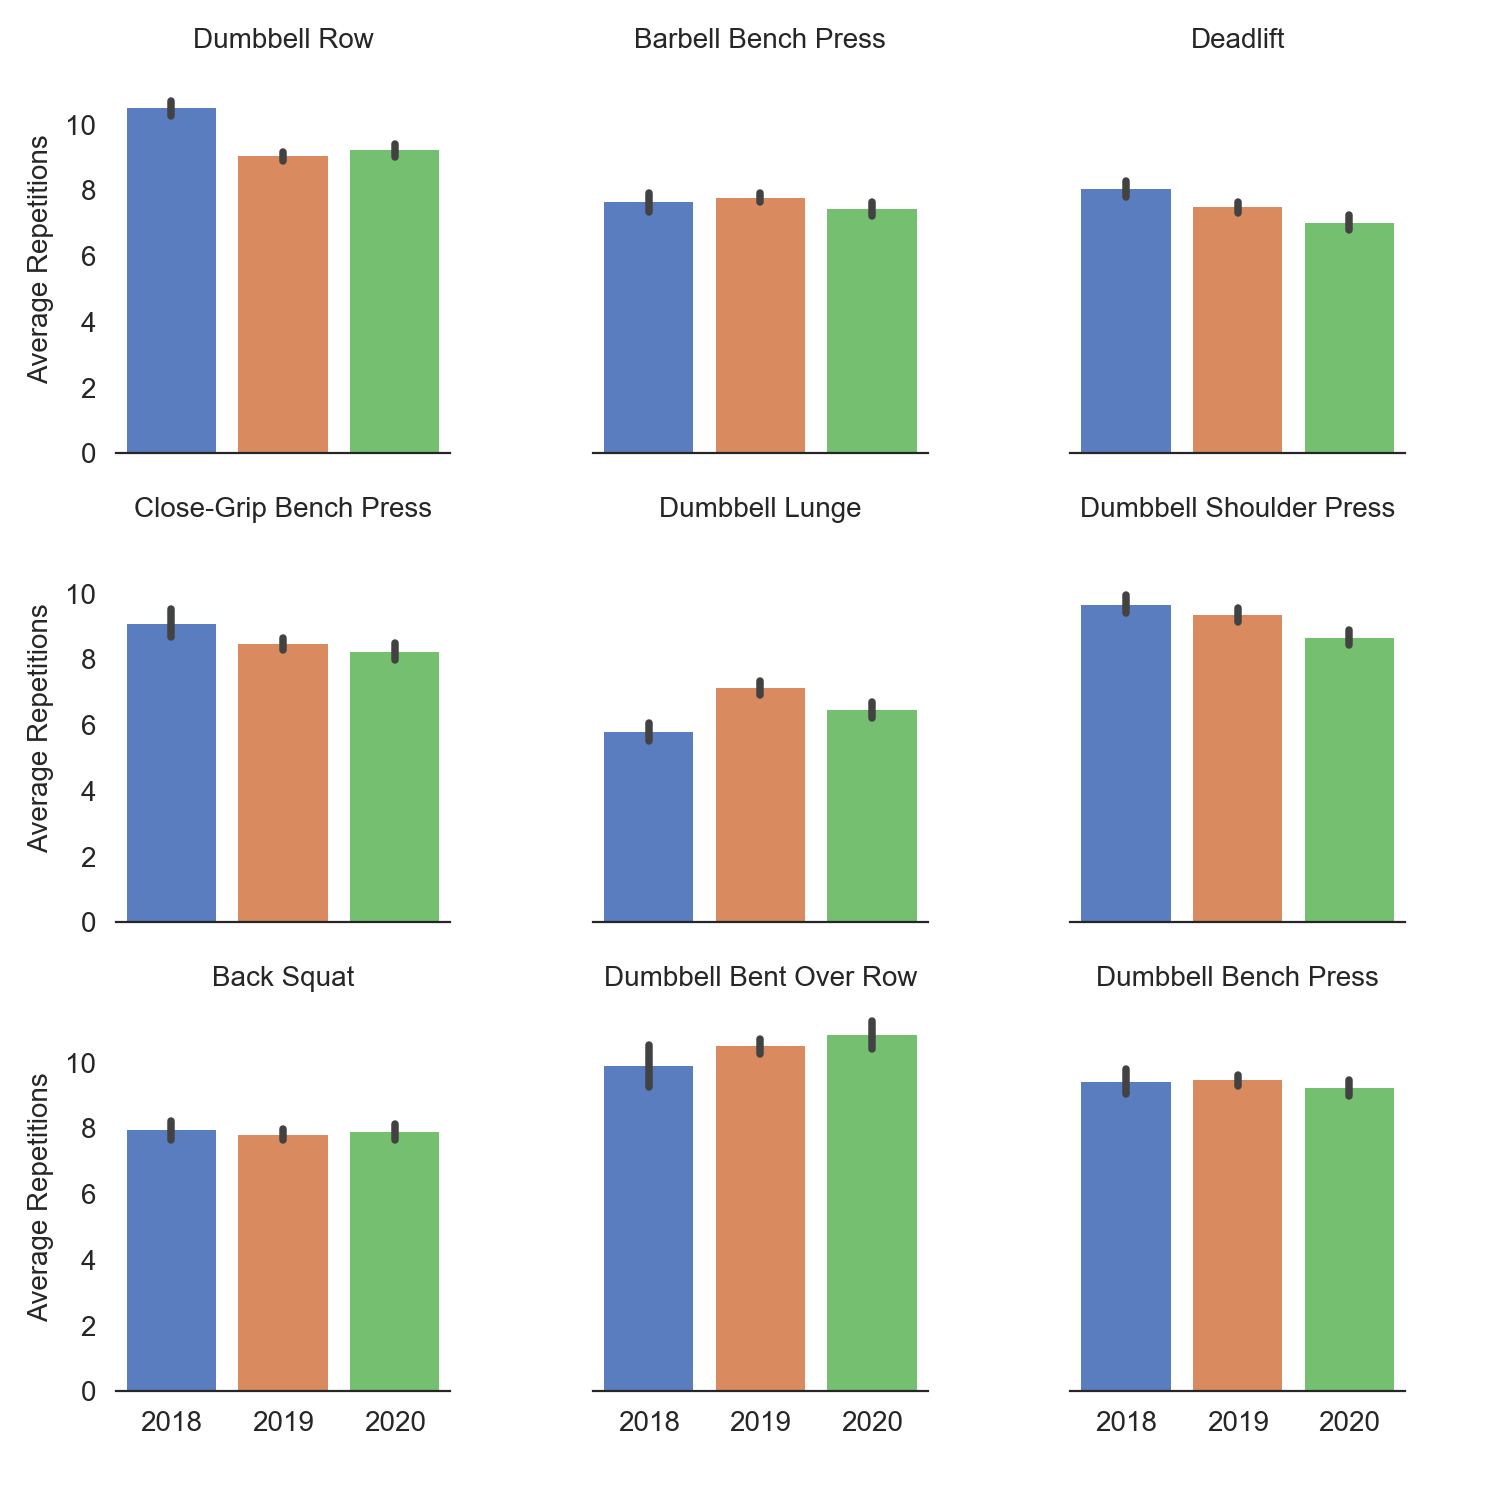

In [92]:
avg_rep_year_exercise = sns.catplot(x="year", y="reps", col="exerciseName", data=df,
                                    height=2.5, aspect=1, col_wrap=3, kind="bar",
                                    palette="muted", estimator=np.mean)

(avg_rep_year_exercise.set_axis_labels("", "Average Repetitions")
                      .despine(left=True)
                      .set_titles("{col_name}"))

### Collaborative filtering

Collaborative filtering is a technique that can filter out items (in our case exercises) that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the exercises they like and combines them to create a ranked list of suggestions.

Let's create a variable that measure if a user 'like' an exercise by looking at the frequency of this exercise.

In [168]:
dt = df[['exerciseName', 'fake_user_id', 'Date']].drop_duplicates()
num_per_exercise = dt.groupby(['fake_user_id', 'exerciseName']).agg({"Date": "nunique"}).reset_index()
num_per_exercise.columns = ['fake_user_id', 'exerciseName', 'number']
num_per_exercise.head()

,fake_user_id,exerciseName,number
0,fake_id_493,Back Squat,5
1,fake_id_493,Barbell Bench Press,4
2,fake_id_493,Close-Grip Bench Press,7
3,fake_id_493,Deadlift,6
4,fake_id_493,Dumbbell Bench Press,8


In [169]:
tot_exercise_per_user = dt[['exerciseName', 'fake_user_id']].groupby('fake_user_id').count().reset_index()
tot_exercise_per_user.columns = ['fake_user_id', 'total_num']
tot_exercise_per_user.head()

,fake_user_id,total_num
0,fake_id_493,46
1,fake_id_494,129
2,fake_id_495,141
3,fake_id_496,17
4,fake_id_497,145


In [172]:
data = pd.merge(num_per_exercise, tot_exercise_per_user, on='fake_user_id', how='left')
data['rate'] = data['number'] / data['total_num']
data

,fake_user_id,exerciseName,number,total_num,rate
0,fake_id_493,Back Squat,5,46,0.108696
1,fake_id_493,Barbell Bench Press,4,46,0.086957
2,fake_id_493,Close-Grip Bench Press,7,46,0.152174
3,fake_id_493,Deadlift,6,46,0.130435
4,fake_id_493,Dumbbell Bench Press,8,46,0.173913
...,...,...,...,...,...
689,fake_id_579,Dumbbell Bent Over Row,1,33,0.030303
690,fake_id_579,Dumbbell Shoulder Press,1,33,0.030303
691,fake_id_580,Dumbbell Bent Over Row,1,3,0.333333
692,fake_id_580,Dumbbell Lunge,1,3,0.333333


Let's scale the rate between 0 and 1 per user.

In [188]:
data_min_max = data[['fake_user_id', 'rate']].groupby('fake_user_id').agg({'rate': ['min', 'max']}).reset_index()
data_min_max.columns = ['fake_user_id', 'val_min', 'val_max']
data_min_max.head()

,fake_user_id,val_min,val_max
0,fake_id_493,0.065217,0.173913
1,fake_id_494,0.038760,0.232558
2,fake_id_495,0.007092,0.234043
3,fake_id_496,0.058824,0.235294
4,fake_id_497,0.027586,0.255172


In [190]:
data = pd.merge(data, data_min_max, on='fake_user_id', how='left')
data['rate_scaled'] = (data.rate - data.val_min) / (data.val_max - data.val_min)

In [202]:
data.isna().sum()

fake_user_id    0
exerciseName    0
number          0
total_num       0
rate            0
val_min         0
val_max         0
rate_scaled     8
dtype: int64

If a user use the same number of time of the exercises he tried, let's put 1 instead of null values. It means the user like all the exercises equally.

In [205]:
data['rate_scaled'] = data['rate_scaled'].fillna(1.0)

In [351]:
data.head()

,fake_user_id,exerciseName,number,total_num,rate,val_min,val_max,rate_scaled
0,fake_id_493,Back Squat,5,46,0.108696,0.065217,0.173913,0.4
1,fake_id_493,Barbell Bench Press,4,46,0.086957,0.065217,0.173913,0.2
2,fake_id_493,Close-Grip Bench Press,7,46,0.152174,0.065217,0.173913,0.8
3,fake_id_493,Deadlift,6,46,0.130435,0.065217,0.173913,0.6
4,fake_id_493,Dumbbell Bench Press,8,46,0.173913,0.065217,0.173913,1.0


#### Split data into train and test sets

In [352]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [353]:
# Let's pivot the data
train_user_exercise = train.pivot(index='fake_user_id',
                                  columns='exerciseName',
                                  values='rate_scaled').fillna(0)

test_user_exercise = test.pivot(index='fake_user_id',
                                columns='exerciseName',
                                values='rate_scaled').fillna(0)

In [355]:
train_user_exercise.head()

exerciseName,Back Squat,Barbell Bench Press,Close-Grip Bench Press,Deadlift,Dumbbell Bench Press,Dumbbell Bent Over Row,Dumbbell Lunge,Dumbbell Row,Dumbbell Shoulder Press
fake_user_id,,,,,,,,,
fake_id_493,0.40000,0.20000,0.000000,0.600000,1.00000,0.00000,0.000000,0.200000,0.400000
fake_id_494,0.20000,0.00000,0.120000,0.160000,1.00000,0.28000,0.000000,0.960000,0.400000
fake_id_495,1.00000,0.15625,0.000000,0.156250,0.90625,0.65625,0.000000,0.125000,0.562500
fake_id_496,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.666667,0.666667,0.000000
fake_id_497,0.30303,1.00000,0.727273,0.575758,0.00000,0.00000,0.000000,0.000000,0.121212


In [380]:
# Apply Singular Value Decomposition
from scipy.sparse.linalg import svds

def singular_value_decomposition(df_user_exercise):
    R = df_user_exercise.as_matrix()
    U, sigma, Vt = svds(R, k=1)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns=df_user_exercise.columns)
    preds_df['fake_user_id'] = np.array(df_user_exercise.index)
    return preds_df

In [381]:
preds_df = singular_value_decomposition(train_user_exercise)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [382]:
df_exercises = df[['exerciseName']].drop_duplicates()

In [383]:
def recommend_exercise(preds_df, user_id, exercise_df, data, num_recommendations=5):
    """
    Recommend exercises for a specific user.
    """
    
    sorted_user_predictions = preds_df.loc[preds_df.fake_user_id==user_id,
                                           preds_df.columns.difference(['fake_user_id'])]\
                                      .squeeze().sort_values(ascending=False)

    user_data = data[data.fake_user_id == user_id]
    user_full = (user_data.merge(exercise_df, how = 'left', on='exerciseName').
                     sort_values(['rate_scaled'], ascending=False)
                 )

    recommendations = (exercise_df[~exercise_df['exerciseName'].isin(user_full['exerciseName'])])\
                        .merge(pd.DataFrame(sorted_user_predictions).reset_index(),
                               how = 'left', on = 'exerciseName')
    recommendations.columns = ['exerciseName', 'Predictions']
    recommendations = recommendations.sort_values('Predictions',
                                                  ascending = False).iloc[:num_recommendations,]
    
    full_preds = (exercise_df[exercise_df['exerciseName'].isin(user_full['exerciseName'])])\
                        .merge(pd.DataFrame(sorted_user_predictions).reset_index(),
                               how = 'left', on = 'exerciseName')
    full_preds.columns = ['exerciseName', 'Predictions']
    full_preds = full_preds.sort_values('Predictions', ascending = False)
                      

    return user_full, recommendations, full_preds

In [384]:
# Let's make predictions for user 576
already_tried, predictions, full_preds = recommend_exercise(preds_df, 'fake_id_576',
                                                            df_exercises, train, 
                                                            num_recommendations=2)

In [385]:
# Predictions for not tried exercises
predictions

,exerciseName,Predictions
0,Barbell Bench Press,0.163095
3,Dumbbell Shoulder Press,0.121958


In [386]:
# Predictions for exercises already tried
full_preds

,exerciseName,Predictions
0,Dumbbell Row,0.154702
2,Dumbbell Bench Press,0.107142
1,Dumbbell Lunge,0.055245


In [387]:
# Exercises user already tried with actual rate_scaled
already_tried

,fake_user_id,exerciseName,number,total_num,rate,val_min,val_max,rate_scaled
1,fake_id_576,Dumbbell Bench Press,3,8,0.375,0.125,0.375,1.0
0,fake_id_576,Dumbbell Lunge,1,8,0.125,0.125,0.375,0.0
2,fake_id_576,Dumbbell Row,1,8,0.125,0.125,0.375,0.0


#### Model Evaluation

I used the Mean Absolute Error as metric. MAE is the absolute difference between the target value and the value predicted by the model.

In [400]:
from sklearn.metrics import mean_absolute_error

In [401]:
def evaluate_model(preds_df, df_exercises, data, user_ids):
    pred = []
    actual = []
    for u_id in user_ids:
        already_tried, _, full_preds = recommend_exercise(preds_df, u_id, df_exercises, data,
                                                          num_recommendations=2)
        pred_actual_df = pd.merge(full_preds, already_tried[['exerciseName', 'rate_scaled']],
                                 on='exerciseName', how='left')
        pred.extend(pred_actual_df.Predictions)
        actual.extend(pred_actual_df.rate_scaled)
    return mean_absolute_error(pred, actual)

In [403]:
user_ids_train = preds_df['fake_user_id']
mae_train = evaluate_model(preds_df, df_exercises, train, user_ids_train)
print('MAE train: %s' %mae_train)

MAE train: 0.27116409678719394


In [405]:
user_ids_test = np.unique(test['fake_user_id'])
mae_test = evaluate_model(preds_df, df_exercises, test, user_ids_test)
print('MAE test: %s' %mae_test)

MAE test: 0.3012204876684369
